<a href="https://colab.research.google.com/github/Suhail727/Data-Science-Projects/blob/master/women_s_clothing_reviews_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and Data

In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [0]:
data.info()

# Extract Necessary columns for analysis in another dataframe
df = data[['Review Text','Rating','Class Name','Age']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


# Data Analysis and Inputing Features

Adding the word counts to a dataframe is a very good practice because we might use these counts to reach some useful information.

In [0]:
# fill NA values by space
df['Review Text'] = df['Review Text'].fillna('')

# CountVectorizer() converts a collection 
# of text documents to a matrix of token counts
vectorizer = CountVectorizer()

# assign a shorter name for the analyze
# which tokenizes the string
analyzer = vectorizer.build_analyzer()


def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        # Returns a list of corresponding count for every word in the string 
        w = vectorizer.fit_transform([s]).toarray()
        # Eg: "This is a This is a very very sentence" --> [[2 1 2 2]]
        
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # Eg: {'is': 2, 'sentence': 1, 'this': 2, 'very': 2}

        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
            # vc hold information about what each value in w stands for.
            # Eg:  d -> {2: 'this', 0: 'is', 3: 'very', 1: 'sentence'}
            # i.e, 2nd item in w stands for 'this', 0th item in w stands for 'is',and so on
            
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
            #Eg: {'is': 2, 'sentence': 1, 'this': 2, 'very': 2}
    return  c

In [0]:
# add new column to the dataframe
df['Word Counts'] = df['Review Text'].apply(wordcounts)
df.head()

,Review Text,Rating,Class Name,Age,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


In [0]:
# selecting some words to examine detailed 
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()  
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))
    
dfwc.head()

,Review Text,Rating,Class Name,Age,Word Counts,awesome,great,fantastic,extraordinary,amazing,...,unhappy,horrible,regret,bad,terrible,annoyed,disappointed,upset,awful,hate
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
word_sum = dfwc[selectedwords].sum()
word_sum

awesome           221
great            6117
fantastic         163
extraordinary       4
amazing           503
super            1726
magnificent         4
stunning          289
impressive          7
wonderful         300
breathtaking       14
love             8951
content            20
pleased           185
happy             705
glad              614
satisfied          12
lucky              52
shocking            4
cheerful           15
wow               126
sad               192
unhappy             7
horrible           46
regret             65
bad               392
terrible           91
annoyed             9
disappointed      585
upset              14
awful              87
hate               92
dtype: int64

Selected Words
love     8951
great    6117
super    1726
happy     705
glad      614
dtype: int64

Class Names
Dresses     6319
Knits       4843
Blouses     3097
Sweaters    1428
Pants       1388
Name: Class Name, dtype: int64


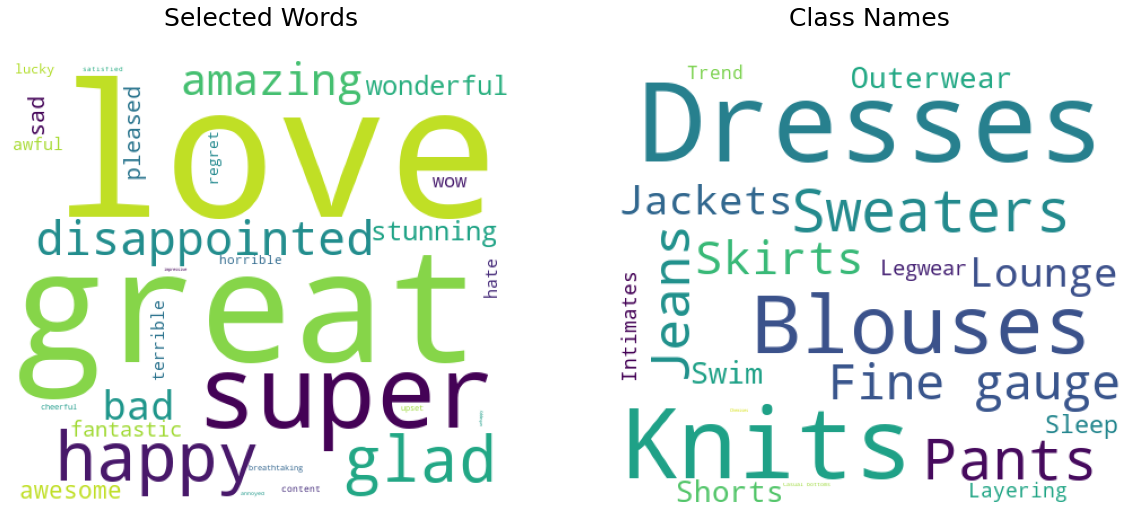

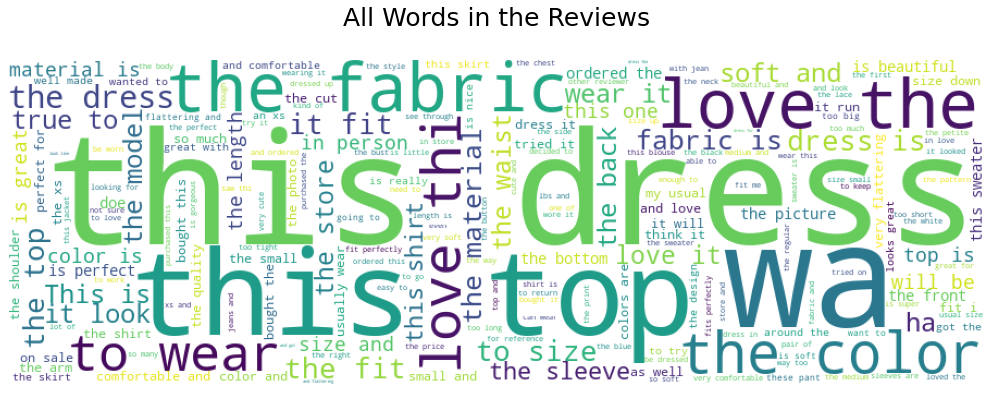

In [0]:
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

print('\nClass Names')
print(df['Class Name'].fillna("Empty").value_counts().iloc[:5])

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

rt = df['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

Plotting relationship between Age,Class and Rating

In [0]:
df1=df['Rating'].value_counts().to_frame()
avgdf1 = df.groupby('Class Name').agg({'Rating': np.average})
avgdf2 = df.groupby('Class Name').agg({'Age': np.average})
avgdf3 = df.groupby('Rating').agg({'Age': np.average})

trace1 = go.Bar(
    x=avgdf1.index,
    y=round(avgdf1['Rating'],2),
    marker=dict(
        color=avgdf1['Rating'],
        colorscale = 'RdBu')
)

trace2 = go.Bar(
    x=df1.index,
    y=df1.Rating,
    marker=dict(
        color=df1['Rating'],
        colorscale = 'RdBu')
)

trace3 = go.Bar(
    x=avgdf2.index,
    y=round(avgdf2['Age'],2),
    marker=dict(
        color=avgdf2['Age'],
        colorscale = 'RdBu')
)

trace4 = go.Bar(
    x=avgdf3.index,
    y=round(avgdf3['Age'],2),
    marker=dict(
        color=avgdf3['Age'],
        colorscale = 'Reds')
)

fig = tools.make_subplots(rows=2, cols=2, print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout']['xaxis1'].update(title='Class')
fig['layout']['yaxis1'].update(title='Average Rating')
fig['layout']['xaxis2'].update(title='Rating')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['xaxis3'].update(title='Class')
fig['layout']['yaxis3'].update(title='Average Age of the Reviewers')
fig['layout']['xaxis4'].update(title='Rating')
fig['layout']['yaxis4'].update(title='Average Age of the Reviewers')

fig['layout'].update(height=800, width=900,showlegend=False)
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)',
                   'paper_bgcolor':'rgba(0,0,0,0)'})
py.iplot(fig)

                  Rating
Class Name              
Blouses         4.154020
Casual bottoms  4.500000
Chemises        4.000000
Dresses         4.150815
Fine gauge      4.260909
Intimates       4.279221
Jackets         4.295455
Jeans           4.360942
Knits           4.161677
Layering        4.376712
Legwear         4.278788
Lounge          4.301013
Outerwear       4.198171
Pants           4.265850
Shorts          4.255521
Skirts          4.245503
Sleep           4.285088
Sweaters        4.179272
Swim            4.197143
Trend           3.815126


# Sentiment Analysis Modelling

In [0]:
# No Column for sentiment, so we use ratings instead
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()


,Review Text,Rating,Class Name,Age,Word Counts,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,"I love tracy reese dresses, but this one is no...",2,Dresses,49,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


In [0]:
# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
# select the columns and 
# prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

In [0]:
# Logistic Regression
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Logistic Regression Elapsed time: ',str(dt.datetime.now()-start))

# Naive Bayes
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Naive Bayes Elapsed time: ',str(dt.datetime.now()-start))

#SVM
start=dt.datetime.now()
svm = SVC()
svm.fit(X_train,y_train)
print('SVM Elapsed time: ',str(dt.datetime.now()-start))

# Neural Net
start=dt.datetime.now()
nn = MLPClassifier()
nn.fit(X_train,y_train)
print('Neural Net Elapsed time: ',str(dt.datetime.now()-start))

Logistic Regression Elapsed time:  0:00:00.736996
Naive Bayes Elapsed time:  0:00:00.010095
SVM Elapsed time:  0:00:43.229269
Neural Net Elapsed time:  0:01:20.411254


# Model Evaluation

In [0]:
# define a dataframe for the predictions
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['Neural Network'] = nn.predict(X_train)
df2.head()

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
19218,I love this dress's gentle blue lace. the silh...,5,Dresses,35,"{'and': 1, 'as': 1, 'blue': 1, 'chest': 1, 'dr...",True,True,True,True,True
3530,Beautiful choice...beautiful fit for my daught...,5,Knits,51,"{'beautiful': 2, 'body': 1, 'choice': 1, 'daug...",True,True,True,True,True
15663,"If you are shaped anything like me, you will h...",4,Dresses,25,"{'am': 1, 'and': 2, 'anything': 1, 'are': 1, '...",True,True,True,True,True
21310,This top is so cute and of spectacular quality...,5,Blouses,33,"{'10': 1, '34c': 1, 'all': 1, 'almost': 1, 'an...",True,True,True,True,True
15154,First saw this poncho on a petite blog and aft...,5,Sweaters,56,"{'after': 1, 'and': 5, 'below': 1, 'blog': 1, ...",True,True,True,True,True


ROC Curve and AUC

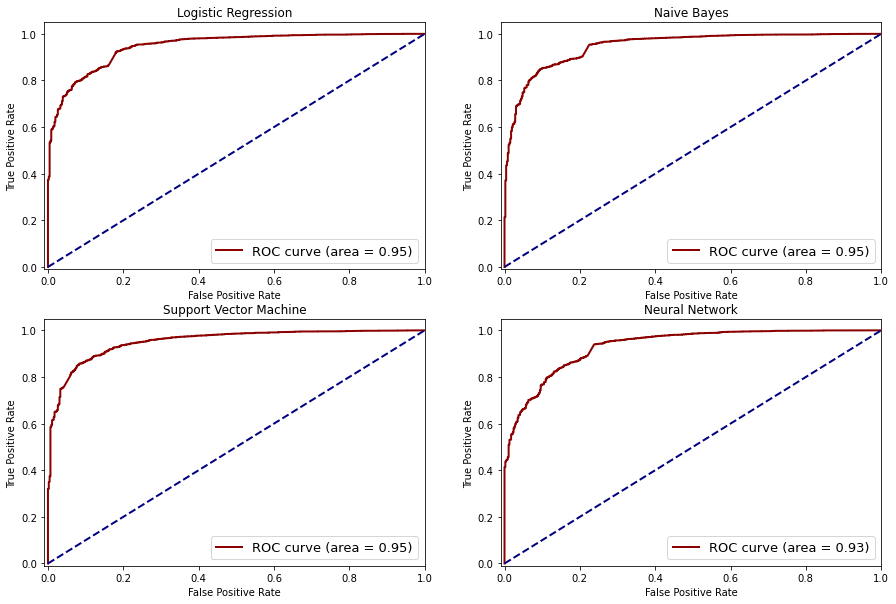

In [0]:
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(X_test)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test.values,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

f, axes = plt.subplots(2, 2,figsize=(15,10))

axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13);

Confusion Matrix

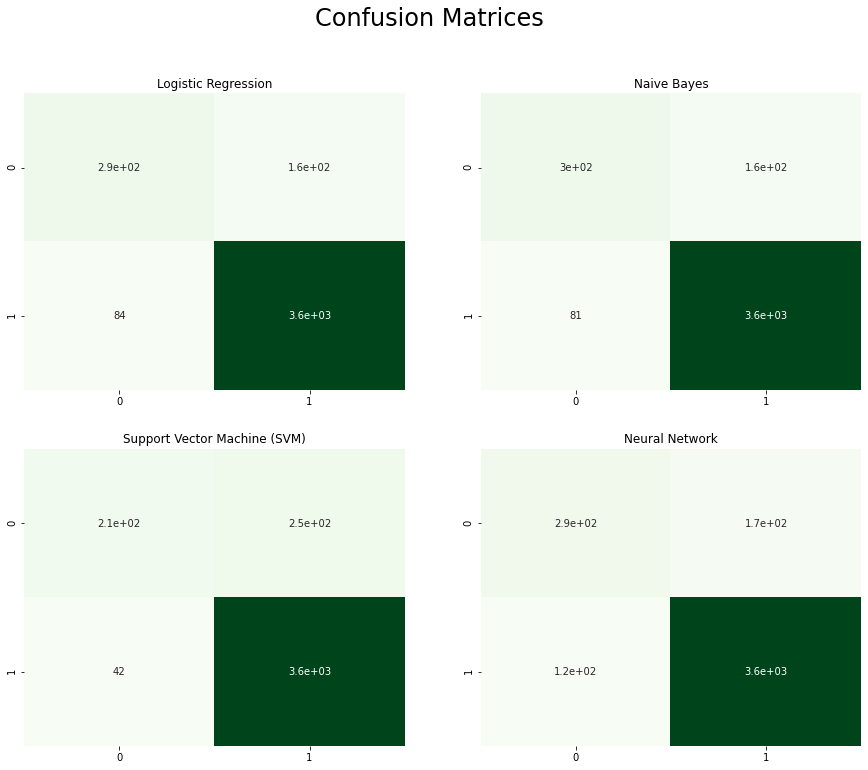

In [0]:
# preparation for the confusion matrix
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="Greens",cbar=False);

Precision - Recall - F1-Score

In [0]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n Neural Network")
print(mt.classification_report(y_test, nn.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

       False       0.78      0.64      0.70       458
        True       0.96      0.98      0.97      3665

    accuracy                           0.94      4123
   macro avg       0.87      0.81      0.83      4123
weighted avg       0.94      0.94      0.94      4123


 Naive Bayes
              precision    recall  f1-score   support

       False       0.79      0.65      0.71       458
        True       0.96      0.98      0.97      3665

    accuracy                           0.94      4123
   macro avg       0.87      0.82      0.84      4123
weighted avg       0.94      0.94      0.94      4123


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.83      0.45      0.59       458
        True       0.94      0.99      0.96      3665

    accuracy                           0.93      4123
   macro avg       0.88      0.72      0.77      4123
weighted 